<a href="https://colab.research.google.com/github/elrichgro/irccam-pmodwrc/blob/main/irccam/notebooks/sun_position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from skimage.filters import threshold_otsu

In [ ]:
# Plot results
def plot_ax(gs, img):
  ax = plt.subplot(gs)
  plt.axis('off')
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.imshow(img)

def plot_results(results):
  dim_size = 5
  rows = len(results)
  cols = len(results[0])
  plt.figure(figsize = (dim_size*cols,dim_size*rows))
  gs = gridspec.GridSpec(rows, cols)
  gs.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 

  for i in range(rows):
    for j in range(cols):
      plot_ax(gs[i*cols+j], results[i][j])

  plt.show()

In [ ]:
#  Mount data
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install pysolar

     |████████████████████████████████| 51kB 4.3MB/s 


In [ ]:
from pysolar.solar import *
import datetime
from pytz import timezone

# Davos: 46.8138007100499, 9.844336368549202

In [ ]:
items = [
  ('20180105', 0),
  ('20180105', 10),
  ('20180504', 5),
  ('20180704', 10),
  ('20180904', 3),
  ('20180904', 40),
  ('20181104', 0),
  ('20181104', 20)
]

In [ ]:
def get_img_and_ts(day, idx):
  with h5py.File("/content/drive/My Drive/dsl/datasets/optimized_3/{}.h5".format(day), "r") as f:
    img = f['irc'][idx]
    ts = f['timestamp'][idx]
  return img, ts

def draw_sun(img_raw, sun, radius=20):
  img = np.copy(img_raw)
  cv2.circle(img, sun, radius, 255, -1)
  img[img_raw > 230] = 0
  return img

In [ ]:
def get_sun_position(ts):
  # Date
  date = datetime.datetime.strptime(ts, "%Y%m%d%H%M%S")
  tz = timezone('UTC')
  date = tz.localize(date)

  # Sun angles
  # davos = (46.8138007100499, 9.844336368549202)
  davos = (46.813492, 9.844433)
  azimuth = get_azimuth(*davos, date)
  zenith = 90 - get_altitude(*davos, date)
  # print(azimuth, zenith)

  # Position in image
  center = (220, 220)
  radius = 220
  alpha = 90
  sun_x = int(center[0] - radius * np.sin(np.radians(azimuth)) * zenith / alpha)
  sun_y = int(center[1] + radius * np.cos(np.radians(azimuth)) * zenith / alpha)
  sun = (sun_x, sun_y) 
  # print(sun)
  return sun

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


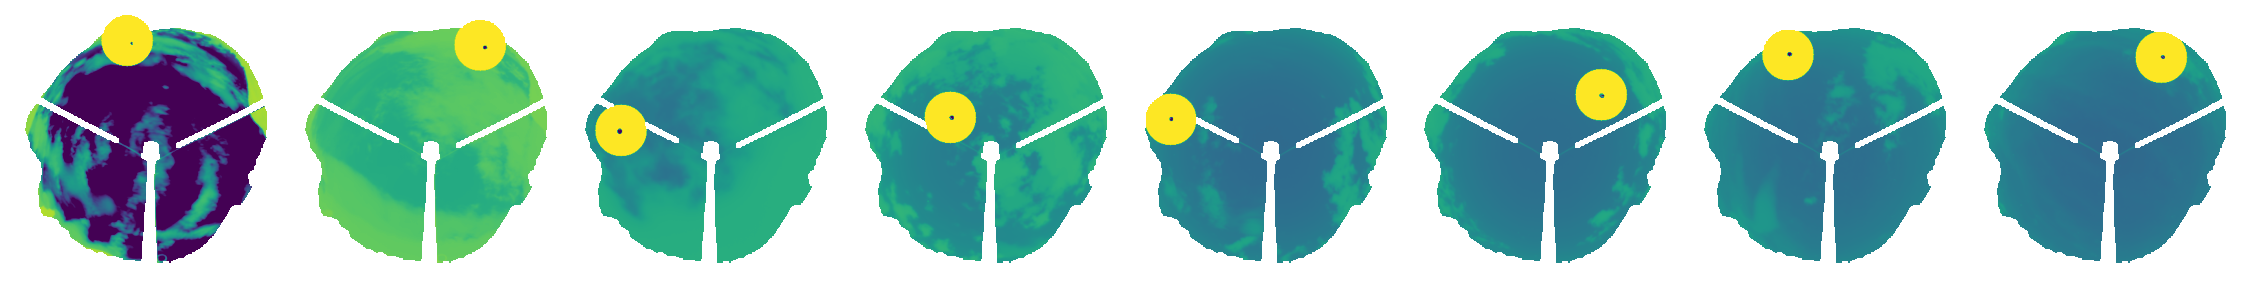

In [ ]:
from time import time
imgs = []
suns = []
for i in items:
  img, ts = get_img_and_ts(*i)
  sun = get_sun_position(ts)
  imgs.append(img)
  suns.append(draw_sun(img, sun, radius=40))

results = [suns]
plot_results(results)

In [ ]:
def create_sun_mask(position, radius, img_size=(420,420)):
  img = np.zeros(img_size).astype(np.uint8)
  cv2.circle(img, position, radius, 1, -1)
  return img

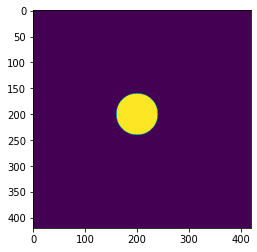

In [ ]:
mask = create_sun_mask((200, 200), 40)
plt.imshow(mask)